In [1]:
import pandas as pd, matplotlib.pyplot as plt, seaborn as sns

In [2]:
smt = pd.read_excel('ProductionReport_EPIX PRO (Gen 2) 51mm_SMT_FactoryPrototypePhase_OHRM.xlsx', sheet_name='Raw data')
assy = pd.read_excel('ProductionReport_EPIX PRO (Gen 2) 51mm_ASSY_ConceptPhase.xlsx', sheet_name='Raw Data')

# SMT

In [3]:
smt.columns

Index(['JobNO', 'ItemNameType', 'StationID', 'SerialNumber', 'tDateTime',
       'Result', 'FixtureID2', 'failitem', 'TestType', 'TestType2',
       'Barometer Temperature', 'AFE Power Consumption data'],
      dtype='object')

AFE Power Consumption data 128/529 24.2%

In [4]:
plt.style.use('fivethirtyeight')

In [5]:
afe = smt[smt.failitem.isin([0,88])].copy()

<AxesSubplot:xlabel='AFE Power Consumption data', ylabel='Count'>

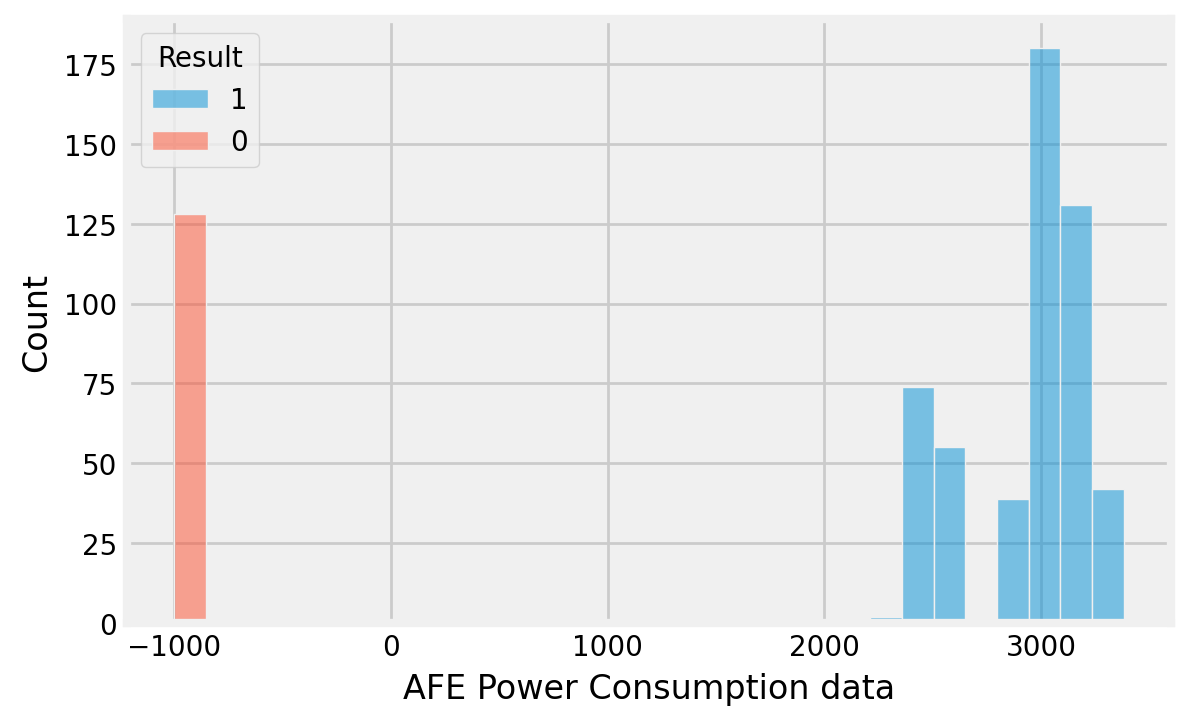

In [6]:
plt.figure(dpi=200)
sns.histplot(data=afe, x='AFE Power Consumption data', hue='Result', hue_order=[1,0])
#Flux在測點上未清潔

In [14]:
afe['AFE Power Consumption data'].describe()

count     651.000000
mean     2160.026418
std      1582.911911
min      -999.000000
25%      2463.820500
50%      2966.588000
75%      3096.618000
max      3380.702000
Name: AFE Power Consumption data, dtype: float64

Barometer Temperature 93/529 17.58%

In [7]:
baro = smt[smt.failitem.isin([0,41])].copy()

In [8]:
baro['Barometer Temperature'] = baro['Barometer Temperature'].clip(lower=-10)

Text(0.5, 1.0, 'Clip -999 to -10')

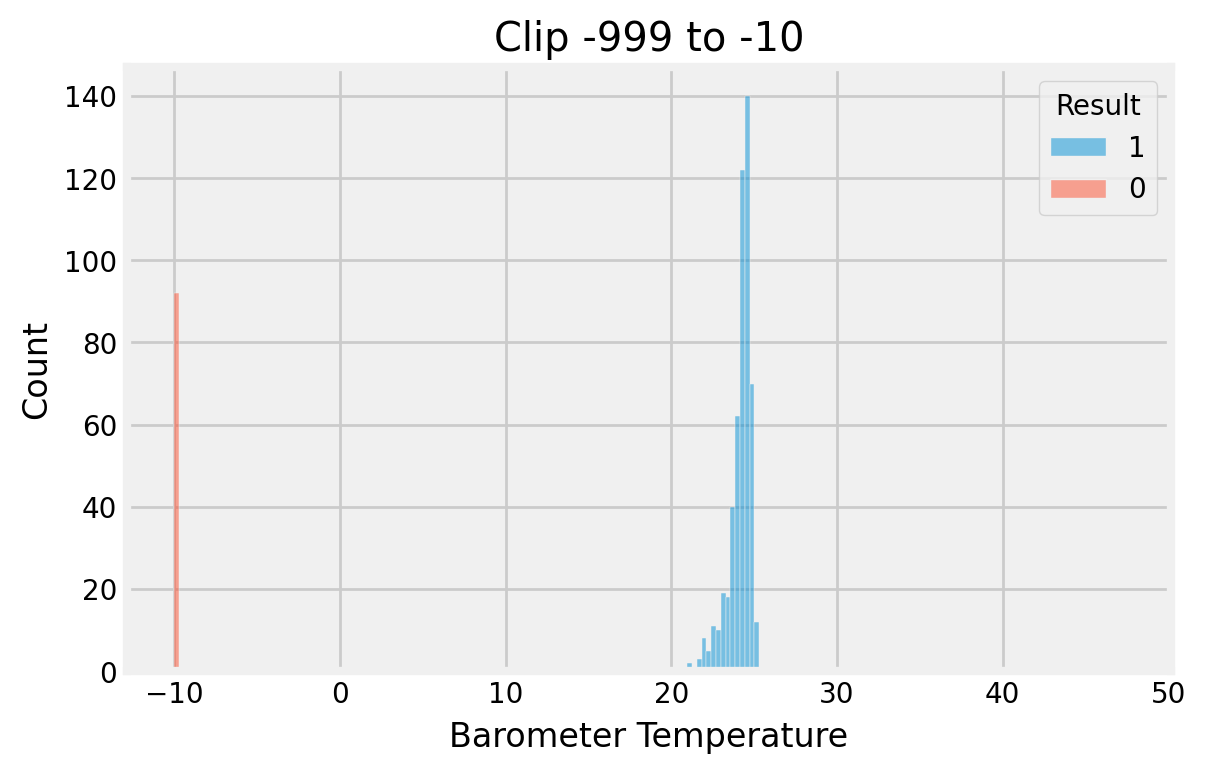

In [9]:
plt.figure(dpi=200)
sns.histplot(data=baro , x='Barometer Temperature', hue='Result', hue_order=[1,0])
plt.title('Clip -999 to -10')
# Baro IC issue, vendor didn't calibrate all IC before shipping

# ASSY

CT GPS_ (L1 + L5) by ref 68/455 14.95%

In [10]:
GPS_L1L5 = assy[(assy.ItemNameType==17800)&(assy.failitem.isin([0,60]))]

<AxesSubplot:xlabel='GPS_ (L1 + L5) by ref', ylabel='Count'>

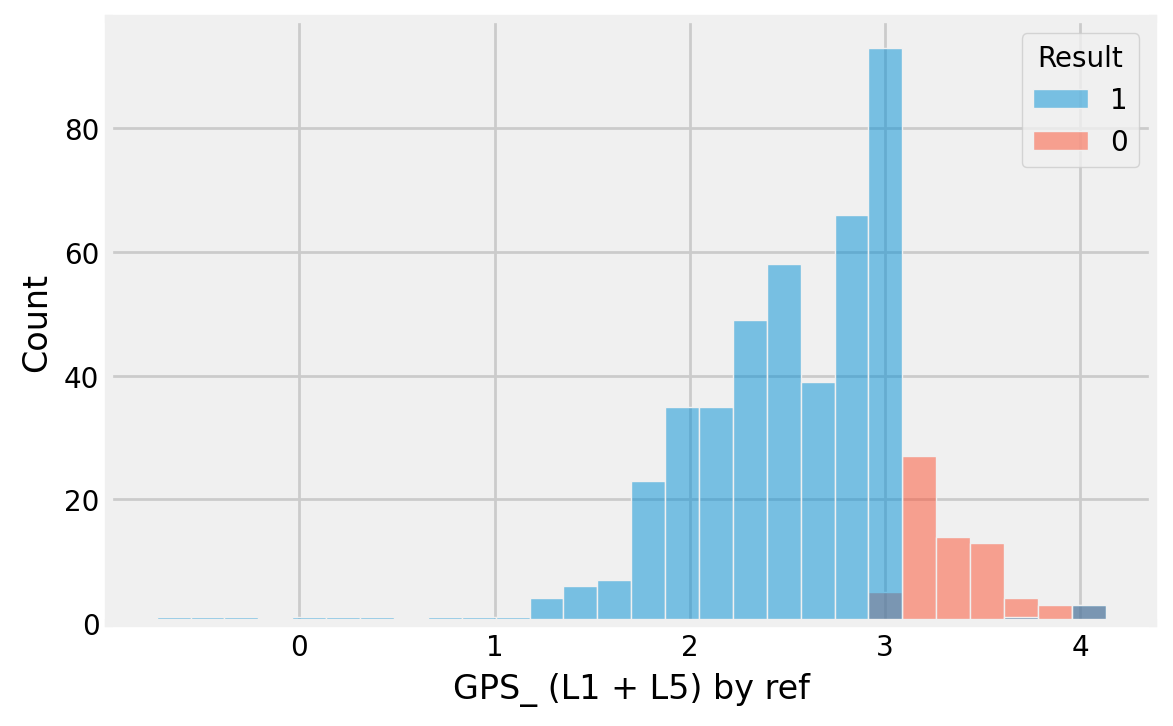

In [11]:
plt.figure(dpi=200)
sns.histplot(data=GPS_L1L5, x='GPS_ (L1 + L5) by ref', hue='Result', hue_order=[1,0])

# Olathe BOM設錯，生產不是預期的組態

FT2 ANT_power 2450MHz BY REF (sapphire) 51/448 11.38%

In [12]:
ant_power = assy[(assy.ItemNameType==17803)&(assy.failitem.isin([0,38]))]

<AxesSubplot:xlabel='ANT_power 2450MHz BY REF (sapphire)', ylabel='Count'>

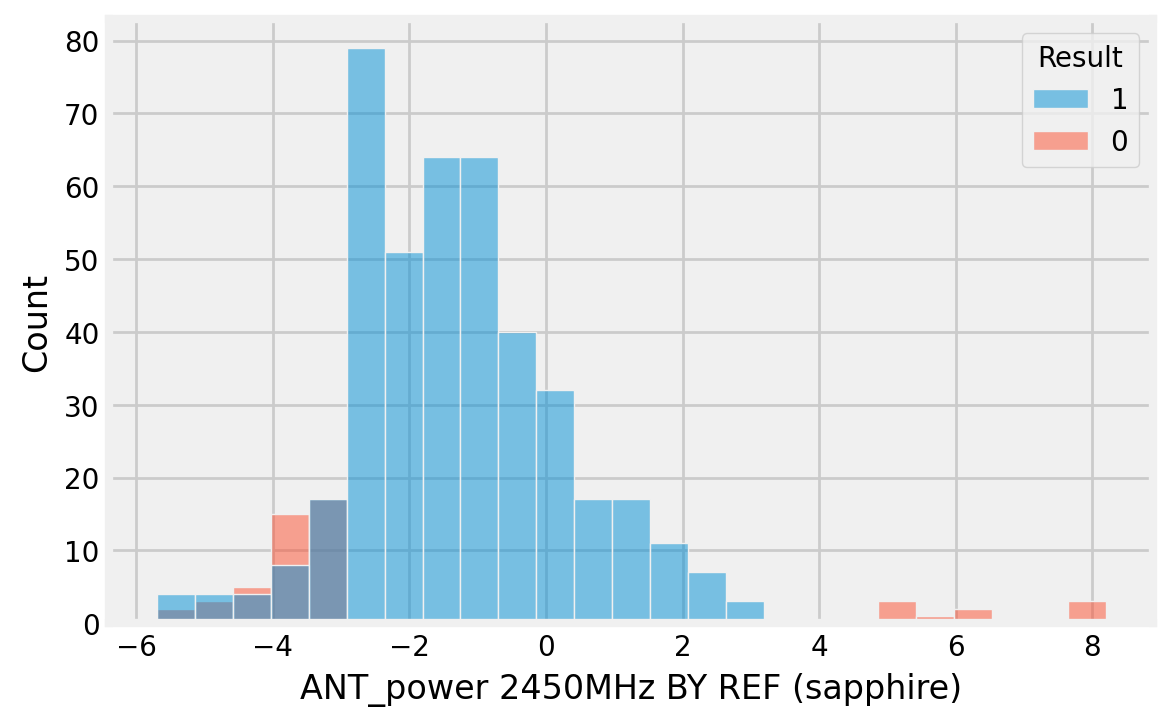

In [13]:
plt.figure(dpi=200)
sns.histplot(data=ant_power, x='ANT_power 2450MHz BY REF (sapphire)', hue='Result', hue_order=[1,0])

# Olathe BOM設錯(同L5)，生產不是預期的組態